# Consumer Complaint Classification

The dataset represents consumer complaints about the number of products.     
Student loan, Credit card or prepaid card and Bank account or service, are the products.    
The RNN has to classify consumer complaints which are text data.

## Library imports

In [1]:
# Basic
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#NLTK
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

# Word cloud
from wordcloud import WordCloud,STOPWORDS
stop_word = set(STOPWORDS)

# Tensorflow and Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation,LSTM
from tensorflow.keras import optimizers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Embedding,SpatialDropout1D

# Notebook environment
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Functions Used

In [2]:
# This function cleans and preprocesses text.
def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = repalce_space.sub(' ', text)
    # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = remove_bad_symbols.sub('', text)  
    text = text.replace('x', '')
    #text = re.sub(r'\W+', '', text)
    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text

# This function generates a word cloud from text with optional title.
def generate_wordcloud(text,title = None): 
    
    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          scale=3,
                          stopwords = stop_word,).generate(text)
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

In [3]:
path = r"Enter your notebook path"
os.chdir(path)

df_complaints = pd.read_csv("dataset/Consumer_Complaints.csv", low_memory=False)
df_complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/07/2019,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,Company has responded to the consumer and the ...,Army and Air Force Exchange Service,AL,358XX,NaN,Consent not provided,Web,06/07/2019,Closed with explanation,Yes,NaN,3267335
1,06/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Bank of CFPB, Washington, DC CFPB PIV",DC,20552,Servicemember,NaN,Web,06/07/2019,Closed with explanation,Yes,NaN,3267169
2,06/07/2019,Debt collection,Other debt,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,Monterey Financial Services LLC,MN,55014,NaN,Consent not provided,Web,06/07/2019,Closed with explanation,Yes,NaN,3266966
3,06/07/2019,Debt collection,Other debt,Communication tactics,Frequent or repeated calls,NaN,NaN,ALLY FINANCIAL INC.,NJ,07103,NaN,NaN,Phone,06/07/2019,In progress,Yes,NaN,3267618
4,06/07/2019,Debt collection,Other debt,False statements or representation,Indicated you were committing crime by not pay...,NaN,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,071XX,NaN,NaN,Web,06/07/2019,Closed with explanation,Yes,NaN,3267687


In [4]:
df_complaints.shape

(1303617, 18)

In [5]:
df_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303617 entries, 0 to 1303616
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1303617 non-null  object
 1   Product                       1303617 non-null  object
 2   Sub-product                   1068451 non-null  object
 3   Issue                         1303617 non-null  object
 4   Sub-issue                     769820 non-null   object
 5   Consumer complaint narrative  384865 non-null   object
 6   Company public response       460903 non-null   object
 7   Company                       1303617 non-null  object
 8   State                         1283431 non-null  object
 9   ZIP code                      1185291 non-null  object
 10  Tags                          178463 non-null   object
 11  Consumer consent provided?    700309 non-null   object
 12  Submitted via                 1303617 non-

In [6]:
df_complaints.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,1303617,1303617,1068451,1303617,769820,384865,460903,1303617,1283431,1185291,178463,700309,1303617,1303617,1303610,1303617,768501,1.303617e+06
unique,2745,18,76,167,218,368146,10,5311,63,22703,3,4,6,2694,8,2,2,NaN
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No,NaN
freq,3553,279773,232150,141196,63477,978,322132,118460,178628,7483,86339,385186,963019,3387,1010625,1271110,620123,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.951265e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.710092e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.142307e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.151242e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.820221e+06


In [7]:
df_complaints.isna().sum()

Date received                         0
Product                               0
Sub-product                      235166
Issue                                 0
Sub-issue                        533797
Consumer complaint narrative     918752
Company public response          842714
Company                               0
State                             20186
ZIP code                         118326
Tags                            1125154
Consumer consent provided?       603308
Submitted via                         0
Date sent to company                  0
Company response to consumer          7
Timely response?                      0
Consumer disputed?               535116
Complaint ID                          0
dtype: int64

In [8]:
df_complaints.duplicated().sum()

0

In [9]:
df_complaints.Product.value_counts()

Mortgage                                                                        279773
Debt collection                                                                 248580
Credit reporting, credit repair services, or other personal consumer reports    236660
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52166
Credit card or prepaid card                                                      49515
Checking or savings account                                                      42364
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11796
Money transfer, virtual currency, or money 

## Filtering observations and columns, to train the model

In [10]:
# Merging some of observations which are same categories
df_complaints.loc[df_complaints['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df_complaints.loc[df_complaints['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df_complaints.loc[df_complaints['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df_complaints.loc[df_complaints['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df_complaints = df_complaints[df_complaints.Product != 'Other financial service']

In [11]:
# Filtering two columns, one column is for input and another one is for output
df_consumer = df_complaints.loc[:,["Consumer complaint narrative","Product"]]

In [12]:
# Drop observations which is NAN
df_consumer  = df_consumer.dropna()

In [13]:
#Taking observations, only for three categories
df_Credit = df_consumer.loc[df_consumer['Product'] == "Credit card or prepaid card", :]
df_bank = df_consumer.loc[df_consumer['Product'] == "Bank account or service", :]
df_student = df_consumer.loc[df_consumer['Product'] == "Student loan", :]

# Merging observations of three categories
df_consumer =pd.concat([df_Credit,df_bank,df_student])

In [14]:
df_consumer.head()

,Consumer complaint narrative,Product
54389,Payments have been made and cleared on my XXXX...,Credit card or prepaid card
55097,On or about XX/XX/XXXX I submitted a complaint...,Credit card or prepaid card
55147,I wanted to make a payment on my due date of X...,Credit card or prepaid card
56059,On XX/XX/XXXX I had 5 separate charges from XX...,Credit card or prepaid card
56732,American Express closed my account based on an...,Credit card or prepaid card


In [15]:
df_consumer.Product.value_counts()

Credit card or prepaid card    40348
Student loan                   21879
Bank account or service        14885
Name: Product, dtype: int64

In [16]:
df_consumer.to_csv("dataset/consumer_complaint_subset.csv", index=False)

In [17]:
df_consumer.shape

(77112, 2)

# ----------------------------------------------------------------------------------

In [18]:
df_consumer =  pd.read_csv("dataset/consumer_complaint_subset.csv", low_memory=False)

In [19]:
df_consumer.head()

,Consumer complaint narrative,Product
0,Payments have been made and cleared on my XXXX...,Credit card or prepaid card
1,On or about XX/XX/XXXX I submitted a complaint...,Credit card or prepaid card
2,I wanted to make a payment on my due date of X...,Credit card or prepaid card
3,On XX/XX/XXXX I had 5 separate charges from XX...,Credit card or prepaid card
4,American Express closed my account based on an...,Credit card or prepaid card


In [20]:
df_consumer["Consumer complaint narrative"].iloc[0]

'Payments have been made and cleared on my XXXX card, issued by XXXX XXXX XXXX XXXX, available credit does not reflect these payments. My credit limit is XXXX, balance is XXXX currently with these payments in amounts of XXXX and XXXX, last two payments posted. My available credit shows zero'

## Cleaning the data set

In [21]:
# Reset the index of dataframe
df_consumer = df_consumer.reset_index(drop=True)

# Create a pattern to filter
repalce_space = re.compile('[/(){}\[\]\|@,;]')

#remove_bad_symbols = re.compile('[^a-zA-Z ]')
remove_bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))

In [22]:
# Clean the data set
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].apply(clean_text)
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].str.replace('\d+', '')

In [23]:
df_consumer["Consumer complaint narrative"].iloc[0]

'payments made cleared card issued available credit reflect payments credit limit balance currently payments amounts last two payments posted available credit shows zero'

In [24]:
df_Credit = df_consumer.loc[df_consumer['Product'] == "Credit card or prepaid card", :]
df_bank = df_consumer.loc[df_consumer['Product'] == "Bank account or service", :]
df_student = df_consumer.loc[df_consumer['Product'] == "Student loan", :]

## The Following code  creates word clouds from the dataset and visualize

### Visualizing most frequent words in the "Credit card or prepaid card" category

In [25]:
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].apply(clean_text)
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].str.replace('\d+', '')

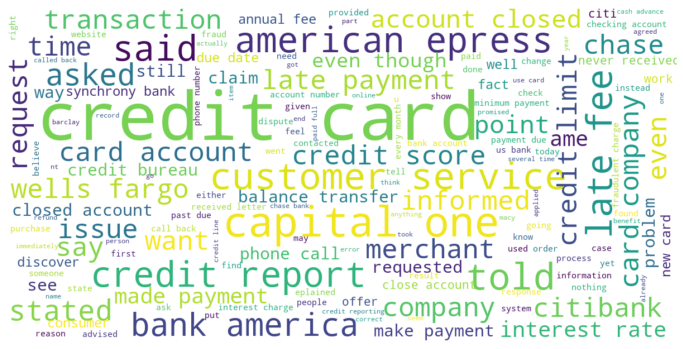

In [26]:
generate_wordcloud(' '.join(df_Credit.iloc[:,0]))

We can notice the frequency of words in "Credit card or prepaid card" category.

### Visualizing most frequent words in the "Bank account or service" category

In [27]:
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].apply(clean_text)
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].str.replace('\d+', '')

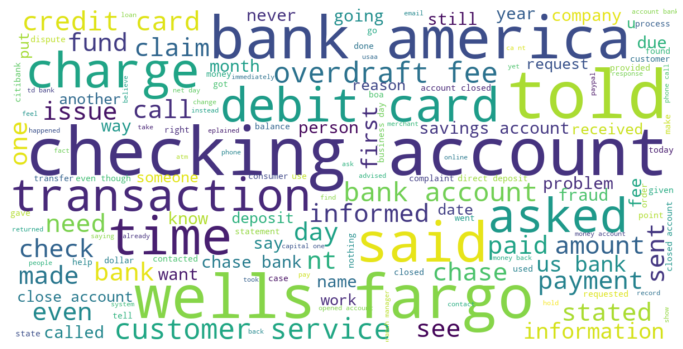

In [28]:
generate_wordcloud(' '.join(df_bank.iloc[:,0]))

We can notice the frequency of words in "Bank account or service" category.

### Visualizing most frequent words in the "Student loan" category

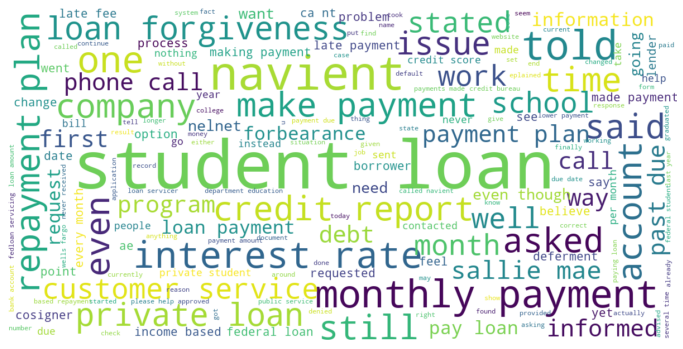

In [29]:
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].apply(clean_text)
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].str.replace('\d+', '')
generate_wordcloud(' '.join(df_student.iloc[:,0]))

We can notice the frequency of words in "Student loan" category.

## Tokenizing the words

In [30]:
# The maximum number of words to be used. (most frequent)
max_no_words = 25000
# Max number of words in each complaint.
max_seq_len = 250
# Create tokenizer object
tokenizer = Tokenizer(num_words=max_no_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fit the tokenizer on text data
tokenizer.fit_on_texts(df_consumer['Consumer complaint narrative'].values)
# Count how many unique tokes are in these observations
word_index = tokenizer.word_index
print('Number of unique tokens %s' % len(word_index))

Number of unique tokens 60897


In [31]:
# Text to sequences 
X = tokenizer.texts_to_sequences(df_consumer['Consumer complaint narrative'].values)

# Padding the sequences
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (77112, 250)


In [32]:
# Create dummies variables for output variable
Y = pd.get_dummies(df_consumer['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (77112, 3)


## Spilit the dataset into train and test dataset

In [33]:
#Traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(53978, 250) (53978, 3)
(23134, 250) (23134, 3)


## Model development with simple RNN

### Training the model

In [34]:
#Create sequential object
model = Sequential()
#Embedding layer
model.add(Embedding(max_no_words, 100, input_length=X.shape[1]))
#Dropout layer
model.add(SpatialDropout1D(0.2))
#RNN layer
model.add(SimpleRNN(100, input_shape = (53978,250), return_sequences = False))
#Fully connected layer
model.add(Dense(3))
model.add(Activation('softmax'))

#Optimizer 
adam = optimizers.Adam(lr = 0.001)
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#Fit the model on the training dataset

history = model.fit(X_train, Y_train,epochs = 20, batch_size = 256, validation_split=0.1,                    
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, restore_best_weights=True)])

Epoch 1/20
190/190 [==============================] - 44s 225ms/step - loss: 0.6177 - accuracy: 0.7423 - val_loss: 0.3784 - val_accuracy: 0.8740
Epoch 2/20
190/190 [==============================] - 48s 251ms/step - loss: 0.2987 - accuracy: 0.8967 - val_loss: 0.2998 - val_accuracy: 0.8979
Epoch 3/20
190/190 [==============================] - 44s 232ms/step - loss: 0.3677 - accuracy: 0.8625 - val_loss: 0.3739 - val_accuracy: 0.8609
Epoch 4/20
190/190 [==============================] - 42s 223ms/step - loss: 0.3361 - accuracy: 0.8698 - val_loss: 0.4221 - val_accuracy: 0.8249
Epoch 5/20
190/190 [==============================] - 43s 229ms/step - loss: 0.2387 - accuracy: 0.9164 - val_loss: 0.2743 - val_accuracy: 0.9144
Epoch 6/20
190/190 [==============================] - 43s 228ms/step - loss: 0.4644 - accuracy: 0.8077 - val_loss: 0.5584 - val_accuracy: 0.7770
Epoch 7/20
190/190 [==============================] - 43s 225ms/step - loss: 0.2874 - accuracy: 0.8999 - val_loss: 0.3307 - val_ac

### Testing the model

In [35]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy [0],accuracy [1]))

723/723 [==============================] - 15s 20ms/step - loss: 0.2822 - accuracy: 0.9096
Test set
  Loss: 0.282
  Accuracy: 0.910


### Visualizing "Loss" and "Accuracy" on each epoch

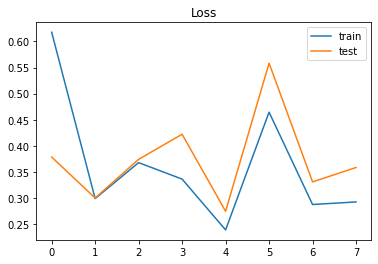

In [36]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing loss on each epoch.

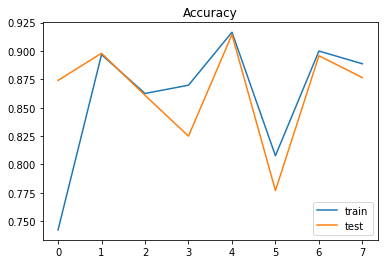

In [37]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing accuracy on each epoch.

In [39]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(Y_test, axis = 1)
print(accuracy_score(y_pred, y_test), "\n")

print(confusion_matrix(y_test, y_pred))

723/723 [==============================] - 16s 22ms/step
0.9095703293853203 

[[ 3743   577    91]
 [  952 10969   219]
 [   78   175  6330]]


There are 4425 observations belongs to "bank account or service". In which, only  3743 observations are correctly predicted.

There are 12140 observations belongs to "Credit card or prepaid card". In which, only 10969 observations are correctly predicted.

There are 6583 observations belongs to "Student loan". In which, only 6330 observations are correctly predicted.

In [40]:
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
print(classification_report(y_test, y_pred, target_names=labels))

                             precision    recall  f1-score   support

    Bank account or service       0.78      0.85      0.82      4411
Credit card or prepaid card       0.94      0.90      0.92     12140
               Student loan       0.95      0.96      0.96      6583

                   accuracy                           0.91     23134
                  macro avg       0.89      0.90      0.90     23134
               weighted avg       0.91      0.91      0.91     23134



Based on the classification report, the RNN model demonstrates strong performance in predicting "Credit card or prepaid card" and "Student loan" observations, achieving an F1-score above 92% for both categories. However, the model's performance is comparatively lower for the "Bank account or service" category.

## Save the model

In [41]:
# Save the model
model.save('model_rnn.h5')

# ------------------------------------------------------------------------------------------------------

## Predictions

In [42]:
path = r"Enter your saved model path"
model = models.load_model(path)

In [43]:
# Single observation
input_text = "i want to check my debit card balance"

# Text to sequences
input_token = tokenizer.texts_to_sequences([input_text])

# Padding the sequences
input_token = pad_sequences(input_token, maxlen=max_seq_len)

# Prediction on single observation
pred_observation = model.predict(input_token)

1/1 [==============================] - 0s 149ms/step


In [44]:
pred_observation

array([[0.3856565 , 0.57624465, 0.03809882]], dtype=float32)

In [45]:
y_pred = np.argmax(pred_observation, axis = 1)
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
labels[int(y_pred)]

'Credit card or prepaid card'

In [46]:
# Make predictions on the entire test set
y_pred = model.predict(X_test)

# Extract predicted classes using argmax
predicted_classes = np.argmax(y_pred, axis=1)

# Map predicted classes to corresponding labels
labels = ['Bank account or service', 'Credit card or prepaid card', 'Student loan']
predicted_labels = [labels[pred_class] for pred_class in predicted_classes]

723/723 [==============================] - 16s 22ms/step


In [47]:
# predicted_labels
predicted_series = pd.Series(predicted_labels)
predicted_series.value_counts()

Credit card or prepaid card    11721
Student loan                    6640
Bank account or service         4773
dtype: int64

The RNN model classifies the customer complains at 91 % accuracy on the test dataset.